In [9]:
import pandas as pd



# 1. Total number of rows and columns
num_rows = data.shape[0]
num_columns = data.shape[1]

# 2. Determine data types for each column
data_types = data.dtypes

# Separate numeric and categorical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# 3. Numeric columns: Calculate min, max, mean, median, and standard deviation
numeric_stats = data[numeric_columns].describe().T
numeric_stats['median'] = data[numeric_columns].median()

# 4. Categorical columns: Calculate unique values and top 3 most frequent values
categorical_stats = {}
for col in categorical_columns:
    unique_vals = data[col].nunique()
    top_values = data[col].value_counts().head(3)
    categorical_stats[col] = {'unique_values': unique_vals, 'top_values': top_values}

# 5. Missing data percentage
missing_percentage = data.isnull().mean() * 100

# Print out the results for the profile table
print(f"Total number of rows: {num_rows}")
print(f"Total number of columns: {num_columns}")
print("\nData Types:")
print(data_types)
print("\nNumeric Column Statistics:")
print(numeric_stats)
print("\nCategorical Column Statistics:")
for col, stats in categorical_stats.items():
    print(f"\nColumn: {col}")
    print(f"Unique Values: {stats['unique_values']}")
    print(f"Top 3 Most Frequent Values: \n{stats['top_values']}")
print("\nMissing Data Percentage:")
print(missing_percentage)


Total number of rows: 292761
Total number of columns: 19

Data Types:
CrimeDate          datetime64[ns]
CrimeTime                  object
CrimeCode                  object
Location                   object
Description                object
Inside/Outside             object
Weapon                     object
Post                       object
District                   object
Neighborhood               object
Longitude                 float64
Latitude                  float64
Location 1                float64
Premise                    object
vri_name1                  object
Total Incidents             int64
Year                        int32
Month                       int32
DayOfWeek                  object
dtype: object

Numeric Column Statistics:
                    count       mean       std        min        25%  \
Longitude        291126.0 -76.617452  0.043734 -81.529189 -76.649094   
Latitude         291126.0  39.306746  0.029658  37.577262  39.288186   
Location 1            0.0 

## task 2
Generate a series of plots to describe the temporal pattern (year-to-year, monthly, and day-of-week) of the overall crime incidence aggregating from all geo-locations;

C:\Users\kpate130\AppData\Local\Temp\ipykernel_9264\2710130487.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


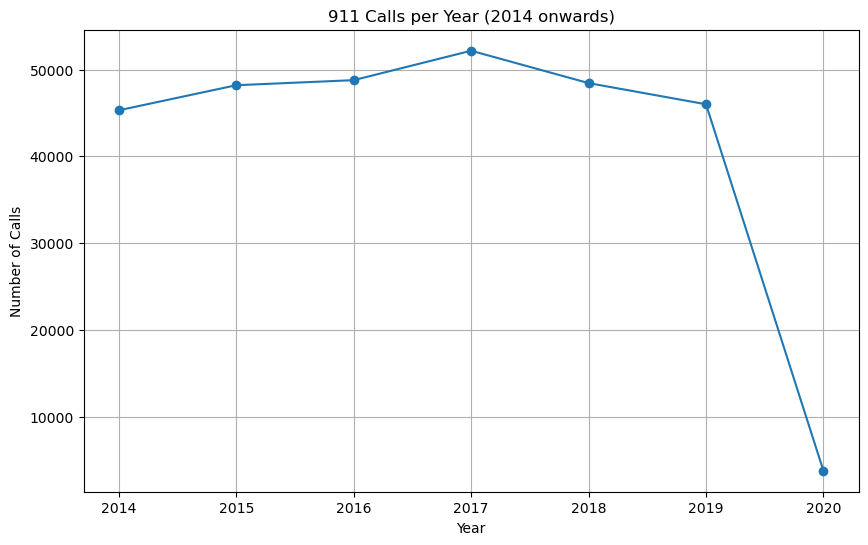

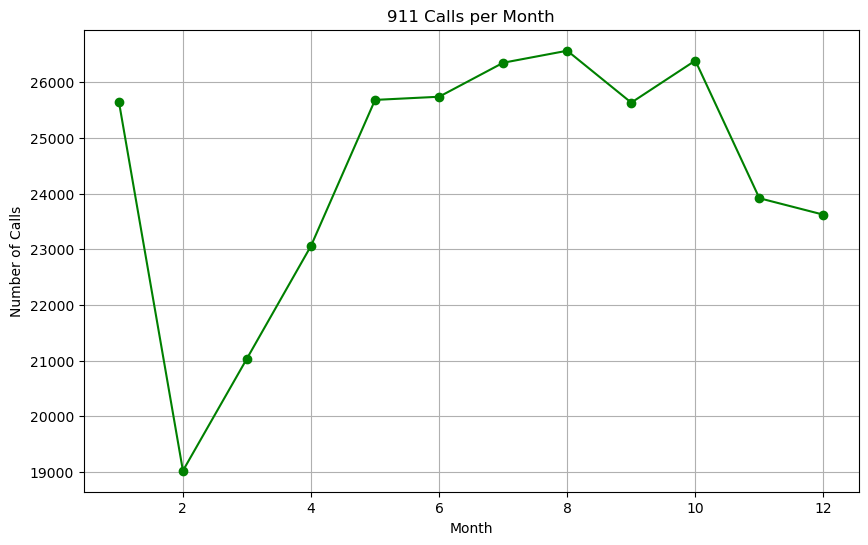

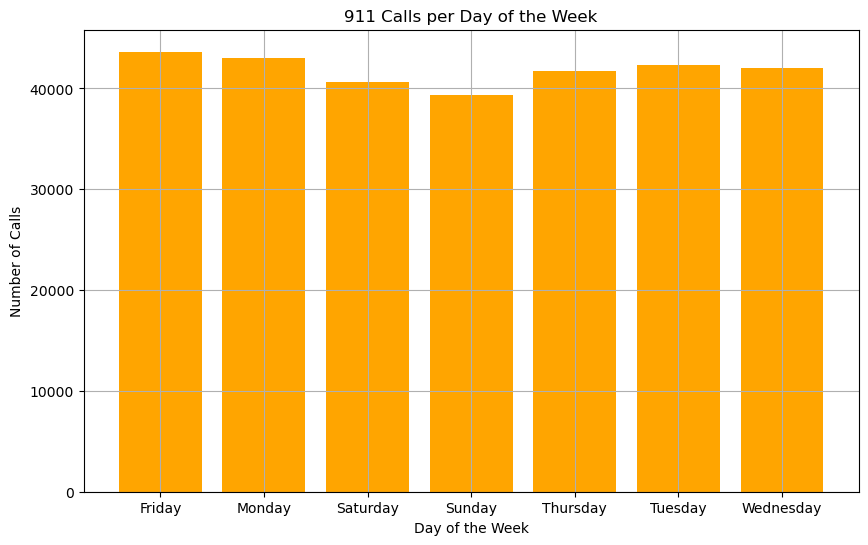

In [13]:

import matplotlib.pyplot as plt


file_path = 'Baltimore911.csv' 
data = pd.read_csv(file_path)


data['CrimeDate'] = pd.to_datetime(data['CrimeDate'], errors='coerce')


data['Year'] = data['CrimeDate'].dt.year
data['Month'] = data['CrimeDate'].dt.month
data['DayOfWeek'] = data['CrimeDate'].dt.day_name()


filtered_data = data[data['Year'] >= 2014]


crime_by_year = filtered_data.groupby('Year').size()
crime_by_month = filtered_data.groupby('Month').size()
crime_by_dayofweek = filtered_data.groupby('DayOfWeek').size()



plt.figure(figsize=(10, 6))
plt.plot(crime_by_year.index, crime_by_year.values, marker='o')
plt.title('911 Calls per Year (2014 onwards)')
plt.xlabel('Year')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(crime_by_month.index, crime_by_month.values, marker='o', color='green')
plt.title('911 Calls per Month')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(crime_by_dayofweek.index, crime_by_dayofweek.values, color='orange')
plt.title('911 Calls per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.show()


## task 3 
Generate a plot describing the distribution of crime type aggregating from all geo-locations and all time periods;

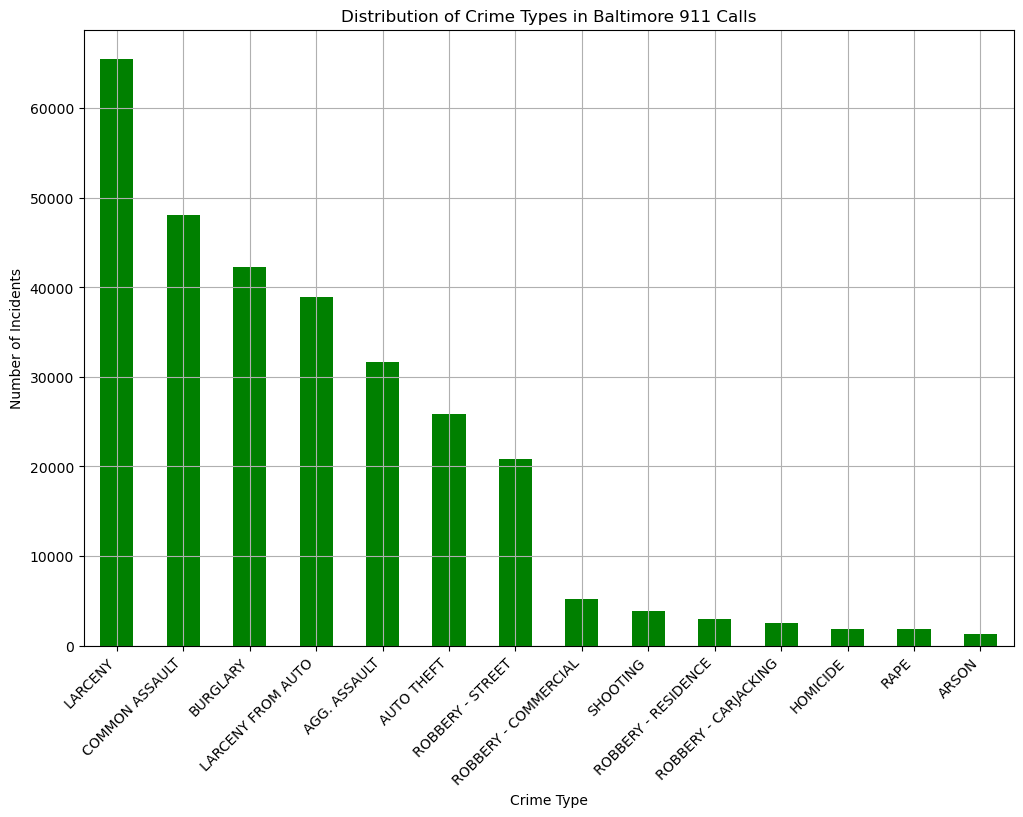

In [12]:

crime_type_distribution = filtered_data['Description'].value_counts()


plt.figure(figsize=(12, 8))
crime_type_distribution.plot(kind='bar', color='green')
plt.title('Distribution of Crime Types in Baltimore 911 Calls')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.grid(True)
plt.show()


## task 4 
Generate a series of plots to illustrate how crime type distributions might vary from year-to-year, month-to-month, or by day-of-week aggregating across all locations.

<Figure size 1200x800 with 0 Axes>

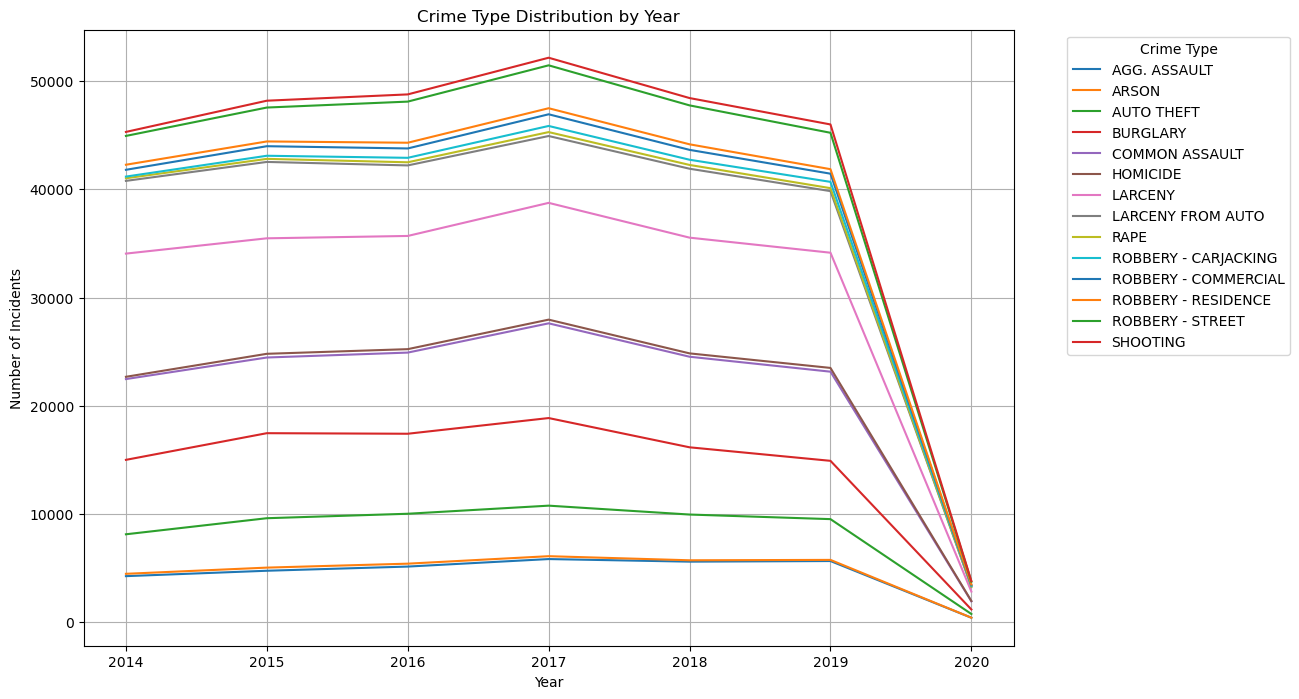

<Figure size 1200x800 with 0 Axes>

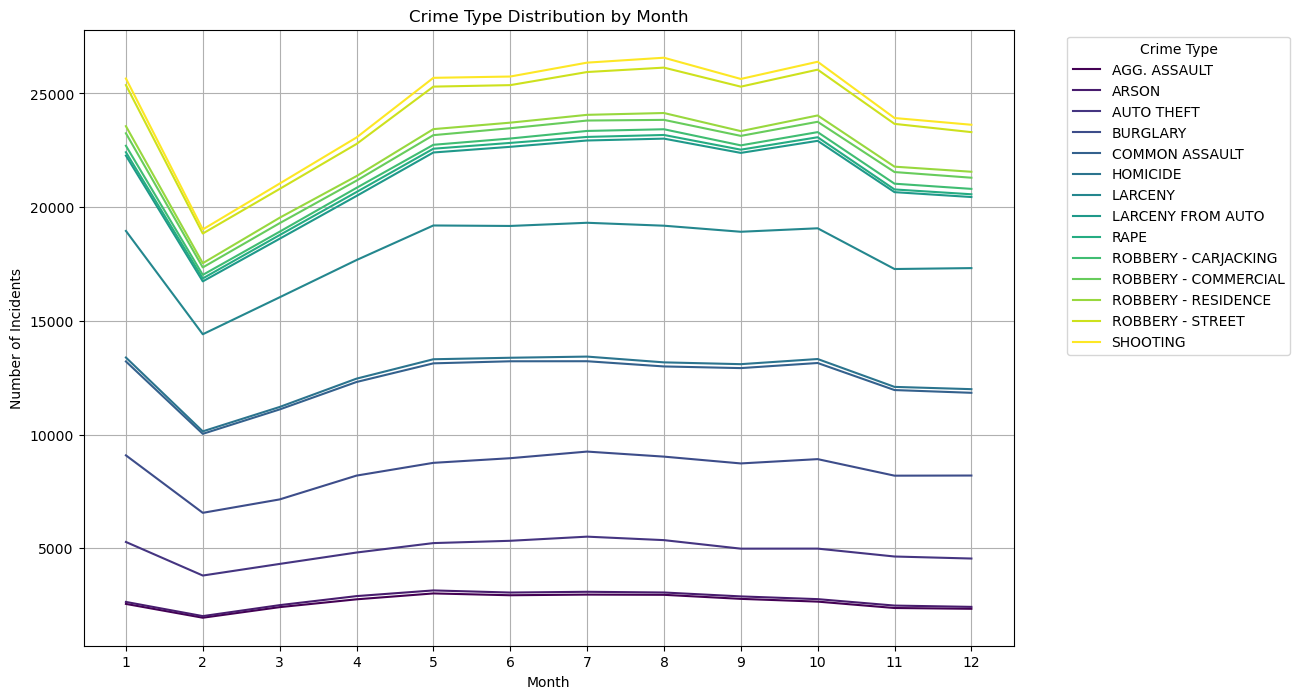

<Figure size 1200x800 with 0 Axes>

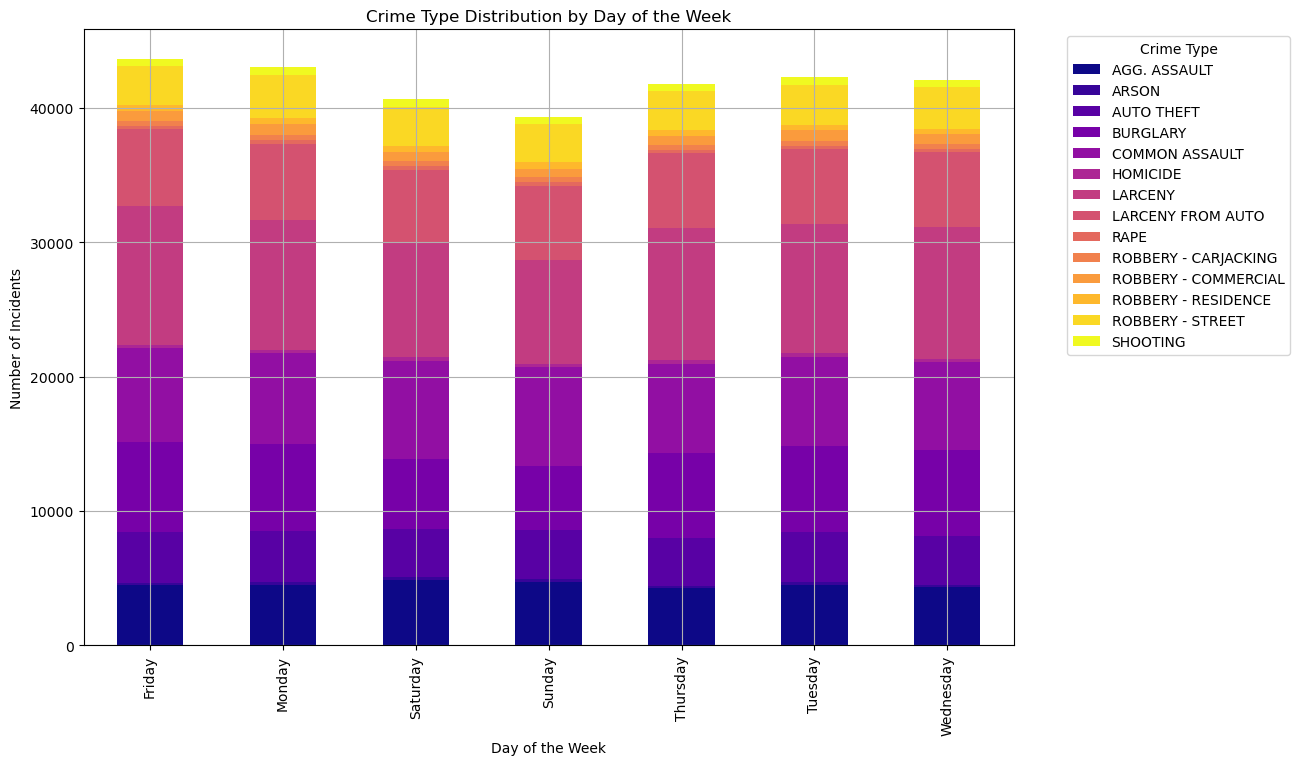

In [11]:


crime_type_by_year = filtered_data.groupby(['Year', 'Description']).size().unstack(fill_value=0)


crime_type_by_month = filtered_data.groupby(['Month', 'Description']).size().unstack(fill_value=0)

crime_type_by_dayofweek = filtered_data.groupby(['DayOfWeek', 'Description']).size().unstack(fill_value=0)


plt.figure(figsize=(12, 8))
crime_type_by_year.plot(kind='line', stacked=True, figsize=(12, 8))
plt.title('Crime Type Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 8))
crime_type_by_month.plot(kind='line', stacked=True, figsize=(12, 8), cmap='viridis')
plt.title('Crime Type Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(range(1, 13))  # Ensure x-axis shows months 1-12
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 8))
crime_type_by_dayofweek.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='plasma')
plt.title('Crime Type Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [19]:
!pip install plotly dash jupyter-dash


In [21]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px



# Sample data (Replace 'filtered_data' with your actual dataset)
df = filtered_data  # Make sure the data has CrimeType, Year, Latitude, Longitude, etc.

# Create the Dash app
app = dash.Dash(__name__)

# App Layout
app.layout = html.Div([
    html.H1("Baltimore 911 Calls Dashboard"),
    
    # Dropdown for Crime Type
    dcc.Dropdown(
        id='crime-type-dropdown',
        options=[{'label': crime_type, 'value': crime_type} for crime_type in df['Description'].unique()],
        value='Larceny',  # Default selection
        multi=True
    ),
    
    # Slider for Year
    dcc.Slider(
        id='year-slider',
        min=df['Year'].min(),
        max=df['Year'].max(),
        value=df['Year'].min(),
        marks={str(year): str(year) for year in df['Year'].unique()},
        step=None
    ),
    
    # Graph for the Map
    dcc.Graph(id='crime-map'),
    
    # Graph for Temporal Patterns
    dcc.Graph(id='temporal-pattern')
])

# Callback to update the map and temporal chart based on user input
@app.callback(
    [Output('crime-map', 'figure'), Output('temporal-pattern', 'figure')],
    [Input('crime-type-dropdown', 'value'), Input('year-slider', 'value')]
)
def update_dashboard(selected_crime_types, selected_year):
    # Filter data based on selected crime types and year
    filtered_df = df[(df['Description'].isin(selected_crime_types)) & (df['Year'] == selected_year)]
    
    # Create Map Figure
    fig_map = px.scatter_mapbox(
        filtered_df, 
        lat="Latitude", 
        lon="Longitude", 
        hover_name="Description", 
        color="Description", 
        zoom=10, 
        height=500
    )
    fig_map.update_layout(mapbox_style="open-street-map")
    
    # Create Temporal Pattern (Crime Count by Month)
    fig_temporal = px.histogram(filtered_df, x='Month', color='Description', title='Crimes per Month')
    
    return fig_map, fig_temporal

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
